#### Problem Statement :-      
    Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:           1. Pre-process the dataset.                                                                                                     2. Identify outliers.                                                                                                           3. Check the correlation. 
    4. Implement linear regression and random forest regression models. 
    5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
  Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

### Pre-processing the dataset

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)               # renaming unnamed column
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])      # changing datatype to datetime
df['day']     = df['pickup_datetime'].apply(lambda x:x.day)
df['hour']    = df['pickup_datetime'].apply(lambda x:x.hour)
df['weekday'] = df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['month']   = df['pickup_datetime'].apply(lambda x:x.month)
df['year']    = df['pickup_datetime'].apply(lambda x:x.year)
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,Thursday,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,Friday,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,Monday,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,Friday,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,Thursday,8,2014


In [6]:
df = df[df['fare_amount']>0]                     # fare_amount can't be negative
df = df[df['passenger_count']<=8]                # considering max passenger_count = 8
df.drop(["id", "key", "pickup_datetime"], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,Thursday,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,Friday,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,Monday,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,Friday,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,Thursday,8,2014


In [7]:
df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,4,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,5,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,1,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,5,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,4,8,2014


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199977 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199977 non-null  float64
 1   pickup_longitude   199977 non-null  float64
 2   pickup_latitude    199977 non-null  float64
 3   dropoff_longitude  199976 non-null  float64
 4   dropoff_latitude   199976 non-null  float64
 5   passenger_count    199977 non-null  int64  
 6   day                199977 non-null  int64  
 7   hour               199977 non-null  int64  
 8   weekday            199977 non-null  int64  
 9   month              199977 non-null  int64  
 10  year               199977 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
count,199977.000000,199977.000000,199977.000000,199976.000000,199976.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000
mean,11.362648,-72.527844,39.935995,-72.526236,39.924406,1.683449,15.704941,13.491427,3.122989,6.282117,2011.742315
std,9.897104,11.437285,7.720462,13.115146,6.793455,1.306934,8.687517,6.515413,1.987301,3.438909,1.856277
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,1.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.000000,8.000000,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,16.000000,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.967155,40.767158,-73.963660,40.768001,2.000000,23.000000,19.000000,5.000000,9.000000,2013.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,31.000000,23.000000,6.000000,12.000000,2015.000000


In [10]:
#dealing with missing values
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
day                  0
hour                 0
weekday              0
month                0
year                 0
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
hour                 0
weekday              0
month                0
year                 0
dtype: int64

### Outlier Detection

<AxesSubplot:xlabel='fare_amount'>

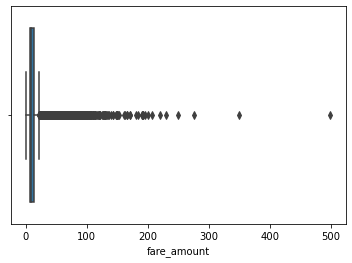

In [12]:
sns.boxplot(x='fare_amount', data=df)

In [13]:
Q1 = np.percentile(df['fare_amount'], 25, interpolation='midpoint')
Q3 = np.percentile(df['fare_amount'], 75, interpolation='midpoint')
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper = ", upper)
print("Lower = ", lower)

Upper =  22.25
Lower =  -3.75


In [14]:
print("Outliers")
df[(df['fare_amount']<lower) | (df['fare_amount']>upper)][{'fare_amount', 'day', 'month', 'year'}]

Outliers


,day,fare_amount,month,year
6,12,24.50,10,2014
30,21,25.70,5,2011
34,4,39.50,6,2014
39,13,29.00,2,2014
48,3,56.80,1,2013
...,...,...,...,...
199976,18,49.70,10,2011
199977,20,43.50,11,2012
199982,6,57.33,8,2014
199985,18,24.00,4,2015


In [15]:
print("old shape", df.shape)
df = df[(df['fare_amount']>=lower) & (df['fare_amount']<=upper)]
print("new shape", df.shape)

old shape (199976, 11)
new shape (182821, 11)


<AxesSubplot:xlabel='fare_amount'>

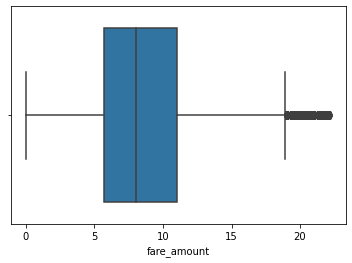

In [16]:
sns.boxplot(x='fare_amount', data=df)

### correlation

In [17]:
corr_matrix=round(df.corr(),2)
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01,0.01,-0.01,0.02,0.03,0.14
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00,0.00,0.00,-0.00,-0.00,0.01
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00,-0.01,-0.00,0.00,0.00,-0.01
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00,0.00,0.00,-0.00,-0.00,0.01
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00,-0.01,-0.00,-0.00,0.00,-0.01
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.02,0.01,0.01,0.00
day,0.01,0.00,-0.01,0.00,-0.01,0.00,1.00,0.01,0.01,-0.02,-0.01
hour,-0.01,0.00,-0.00,0.00,-0.00,0.02,0.01,1.00,0.03,-0.00,0.00
weekday,0.02,-0.00,0.00,-0.00,-0.00,0.01,0.01,0.03,1.00,-0.00,-0.00
month,0.03,-0.00,0.00,-0.00,0.00,0.01,-0.02,-0.00,-0.00,1.00,-0.12


<AxesSubplot:>

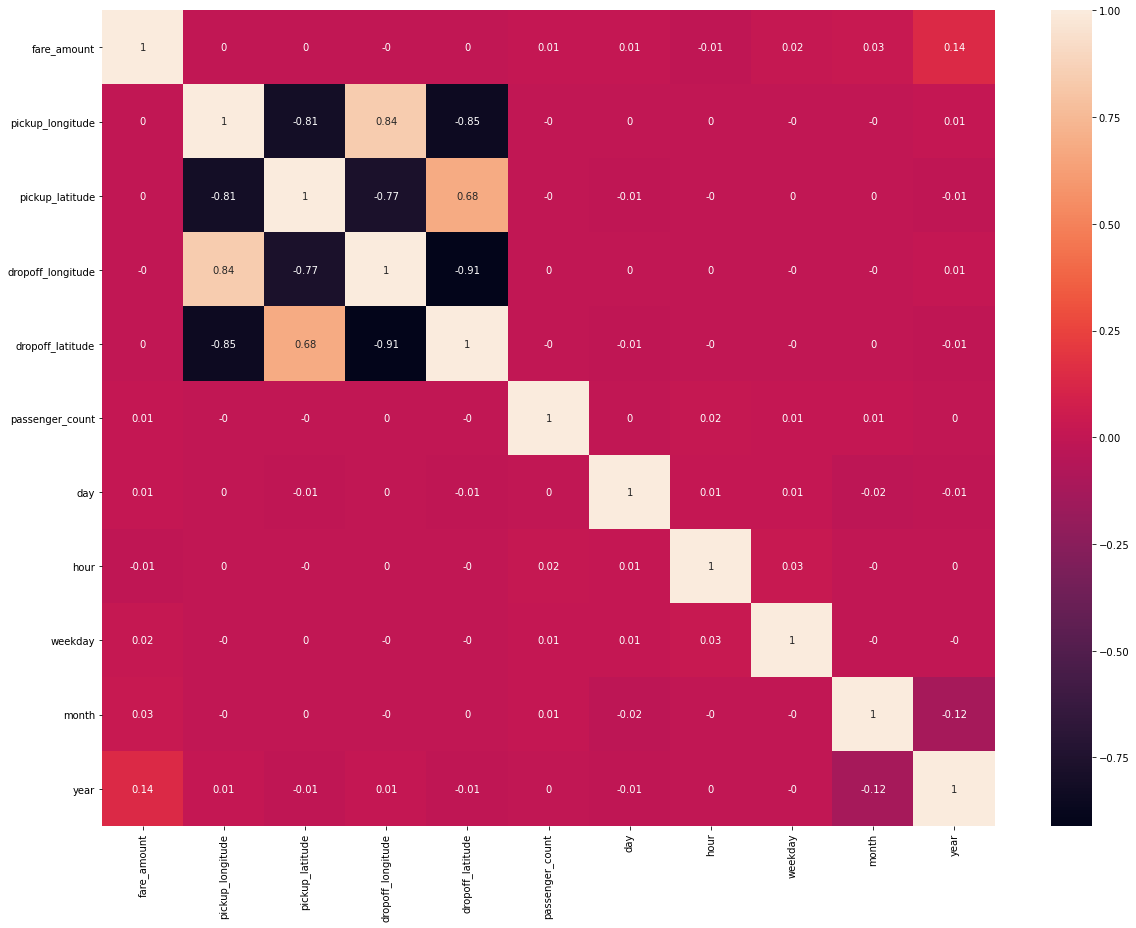

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

### Linear Regression

In [19]:
x = df.drop("fare_amount", axis=1)
y = df['fare_amount']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [21]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
155815,-74.003410,40.751267,-73.999867,40.745835,2,30,22,4,4,2009
27616,-73.974218,40.751765,-73.955965,40.778148,1,12,19,3,10,2011
122768,-73.980811,40.759109,-73.917882,40.754974,1,1,0,6,3,2014
191323,-73.990847,40.750695,-73.994997,40.734060,1,17,18,2,5,2011
62254,-73.987675,40.771227,-73.967665,40.803795,1,24,23,5,10,2014


In [22]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
176146,-73.988240,40.754865,-73.975695,40.759425,6,17,9,3,7,2013
39649,-73.981306,40.724879,-73.996428,40.725486,1,28,16,5,10,2011
83671,-73.958707,40.764050,-73.958707,40.764050,1,18,9,3,12,2013
183922,-73.915300,40.779400,-73.923500,40.761100,1,18,0,6,6,2011
26202,-73.993040,40.727919,-73.977150,40.751498,1,4,17,6,6,2011


In [23]:
x_train.shape

(146256, 10)

In [24]:
x_test.shape

(36565, 10)

In [25]:
ss = preprocessing.StandardScaler()
x_train =  ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [26]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [27]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = lrmodel.predict(x_test)
df_preds = pd.DataFrame({'Actual: ': y_test, 'Predicted: ': y_pred})
df_preds.head(10)

,Actual:,Predicted:
0,9.5,9.586672
1,8.5,8.976306
2,6.0,9.649910
3,9.3,8.938668
4,8.1,8.724896
5,7.7,8.296916
6,7.3,9.116215
7,17.3,8.305642
8,9.7,8.734735
9,9.0,9.738842


In [29]:
lrmodel.score(x_test,y_test)

0.019181175931181516

In [30]:
print("Regression Coefficients : ", lrmodel.coef_)
print("Intercept : ", lrmodel.intercept_)

Regression Coefficients :  [ 0.04681514  0.0342183  -0.02682751 -0.0063804   0.04924538  0.03211746
 -0.06186189  0.09037254  0.17077173  0.58896141]
Intercept :  8.931780234657069


In [31]:
print("Linear regression Model :")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

Linear regression Model :
MSE: 16.933564374924288
MAE: 3.2618394062974816
RMSE: 4.115041236114687
R2 Score: 0.019181175931181516


### Random Forest Regression

In [32]:
rfrmodel = RandomForestRegressor(n_estimators=10, random_state=1)

In [33]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [34]:
print("Random forest regression model : ")
print("MSE:", mean_squared_error(y_test, rfrmodel_pred))
print("MAE:", mean_absolute_error(y_test, rfrmodel_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rfrmodel_pred)))
print('R2 Score:',metrics.r2_score(y_test, rfrmodel_pred))

Random forest regression model : 
MSE: 4.7524971273591925
MAE: 1.5045106431469075
RMSE: 2.1800222768034256
R2 Score: 0.7247278517008784


In [35]:
rfrmodel.score(x_test,y_test)

0.7247278517008784